# Comparing Insertion Sort, Selection Sort and Bubble Sort
The higher the upper limit the better the visualisation

## Configuration

### Import

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
from timeit import default_timer as timer

### Data processing


Import CSV with filter from <https://simplemaps.com/data/world-cities>

In [50]:
cities = np.loadtxt('CSVs/simplemaps_worldcities_basicv1.74/worldcities.csv', 
delimiter = ',', usecols = [1], skiprows = 1, dtype = object, encoding = 'utf-8')

Sample size customisation

In [51]:
def int_check(prompt, no_zero = None):
    while True:
        try:
            value = int(input(prompt))
        except ValueError:
            if no_zero is None:
                value = np.random.randint(np.iinfo(np.int32).max)
            else:
                value = 41001
        
        if no_zero is None and value < 0:
            print("Please input a number larger or equal to 0")
            continue
        
        if no_zero is not None and (value <= 0 or value > len(cities)):
            print("Please input a number larger than 0 and smaller than " + str(len(cities)))
            continue

        clear_output()
        return value

seed_info = int_check('Choose your seed ( ≥ 0 ): ') # If ValueError then a random seed between 0 and top limit of int32 would be selected
np.random.seed(seed_info)

np.random.shuffle(cities) # Inplace shuffle

upper_limit = int_check('Choose your upper limit ( > 0 and ≤ 41001 ): ', True) # If ValueError then max upper limit of 41001 would be used

print(f"Seed: {seed_info}, Upper Limit: {upper_limit}")

Seed: 439978560, Upper Limit: 2000


## __*Insertion*__ **sort**
Insertion sort is a sorting algorithm that places an unsorted element at its suitable place in each iteration.

In [52]:
def Insertion_sort(tosort, descending = None):
    new_reference = tosort.copy()

    start = timer() # Performance - Start timer

    for i in range(1, len(new_reference)):
        key = new_reference[i]
        j = i - 1
        
        while j >= 0 and key > new_reference[j]:
            new_reference[j + 1] = new_reference[j]
            j -= 1
        
        # Place key at after the element just smaller/larger than it.
        new_reference[j+1] = key
    
    end = timer() # Performance - End timer

    return (end - start)*10**6

benchmark_insertion = []
for i in range(1, upper_limit):
    benchmark_insertion.append(Insertion_sort(cities[:i]))

## **_Selection_ sort**
Selection sort is a sorting algorithm that selects the smallest element from an unsorted list in each iteration and places that element at the beginning of the unsorted list.

In [53]:
def Selection_sort(tosort, descending = None):
    new_reference = tosort.copy()

    start = timer() # Performacnce - Start timer
    
    for i in range(len(new_reference)):
        idx = i

        for j in range(i + 1, len(new_reference)):
            if new_reference[j] < new_reference[idx]:
                idx = j
         
        # Swapping
        (new_reference[i], new_reference[idx]) = (new_reference[idx], new_reference[i])
    
    end = timer() # Performance - End timer
    
    return (end - start)*10**6

benchmark_selection = []
for i in range(1, upper_limit):
    benchmark_selection.append(Selection_sort(cities[:i]))

## **_Bubble_ sort**
Bubble sort is a sorting algorithm that compares two adjacent elements and swaps them until they are not in the intended order.

In [54]:
def Bubble_sort(tosort, descending = None):
    new_reference = tosort.copy()

    start = timer() # Performance - Start timer

    # Loop to access each array element
    for i in range(len(new_reference) - 1):

        # Loop to compare array elements
        for j in range(0, len(new_reference) - 1):
            if new_reference[j] > new_reference[j + 1]:
                (new_reference[j], new_reference[j + 1]) = (new_reference[j + 1], new_reference[j])
    
    end = timer() # Performance - End timer
    
    return (end - start)*10**6

benchmark_bubble_1 = []
for i in range(1, upper_limit):
    benchmark_bubble_1.append(Bubble_sort(cities[:i]))

## **_Bubble_ sort** (Optimised)

In [55]:
def Bubble_sort_optimised(tosort, descending = None):
    new_reference = tosort.copy()

    start = timer() # Performance - Start timer

    # Loop to access each array element
    for i in range(len(new_reference)):
        
        # Loop to compare array elements (1 less item each loop)
        for j in range(0, len(new_reference) - i - 1):

            # Compare two adjacent elements and swap in order
            if descending == None:
                if new_reference[j] > new_reference[j + 1]:
                    (new_reference[j], new_reference[j + 1]) = (new_reference[j + 1], new_reference[j])
            # Descending order, change '<' to '>'
            else:
                if new_reference[j] < new_reference[j + 1]:
                    (new_reference[j], new_reference[j + 1]) = (new_reference[j + 1], new_reference[j])

    end = timer() # Performance - End timer

    return (end - start)*10**6

benchmark_bubble_2 = []
for i in range(1, upper_limit):
    benchmark_bubble_2.append(Bubble_sort_optimised(cities[:i]))

## Result Visualisation
Example from https://matplotlib.org/stable/gallery/lines_bars_and_markers/barchart.html

C:\Users\Minh\AppData\Local\Temp/ipykernel_23404/1488059484.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(yticks)


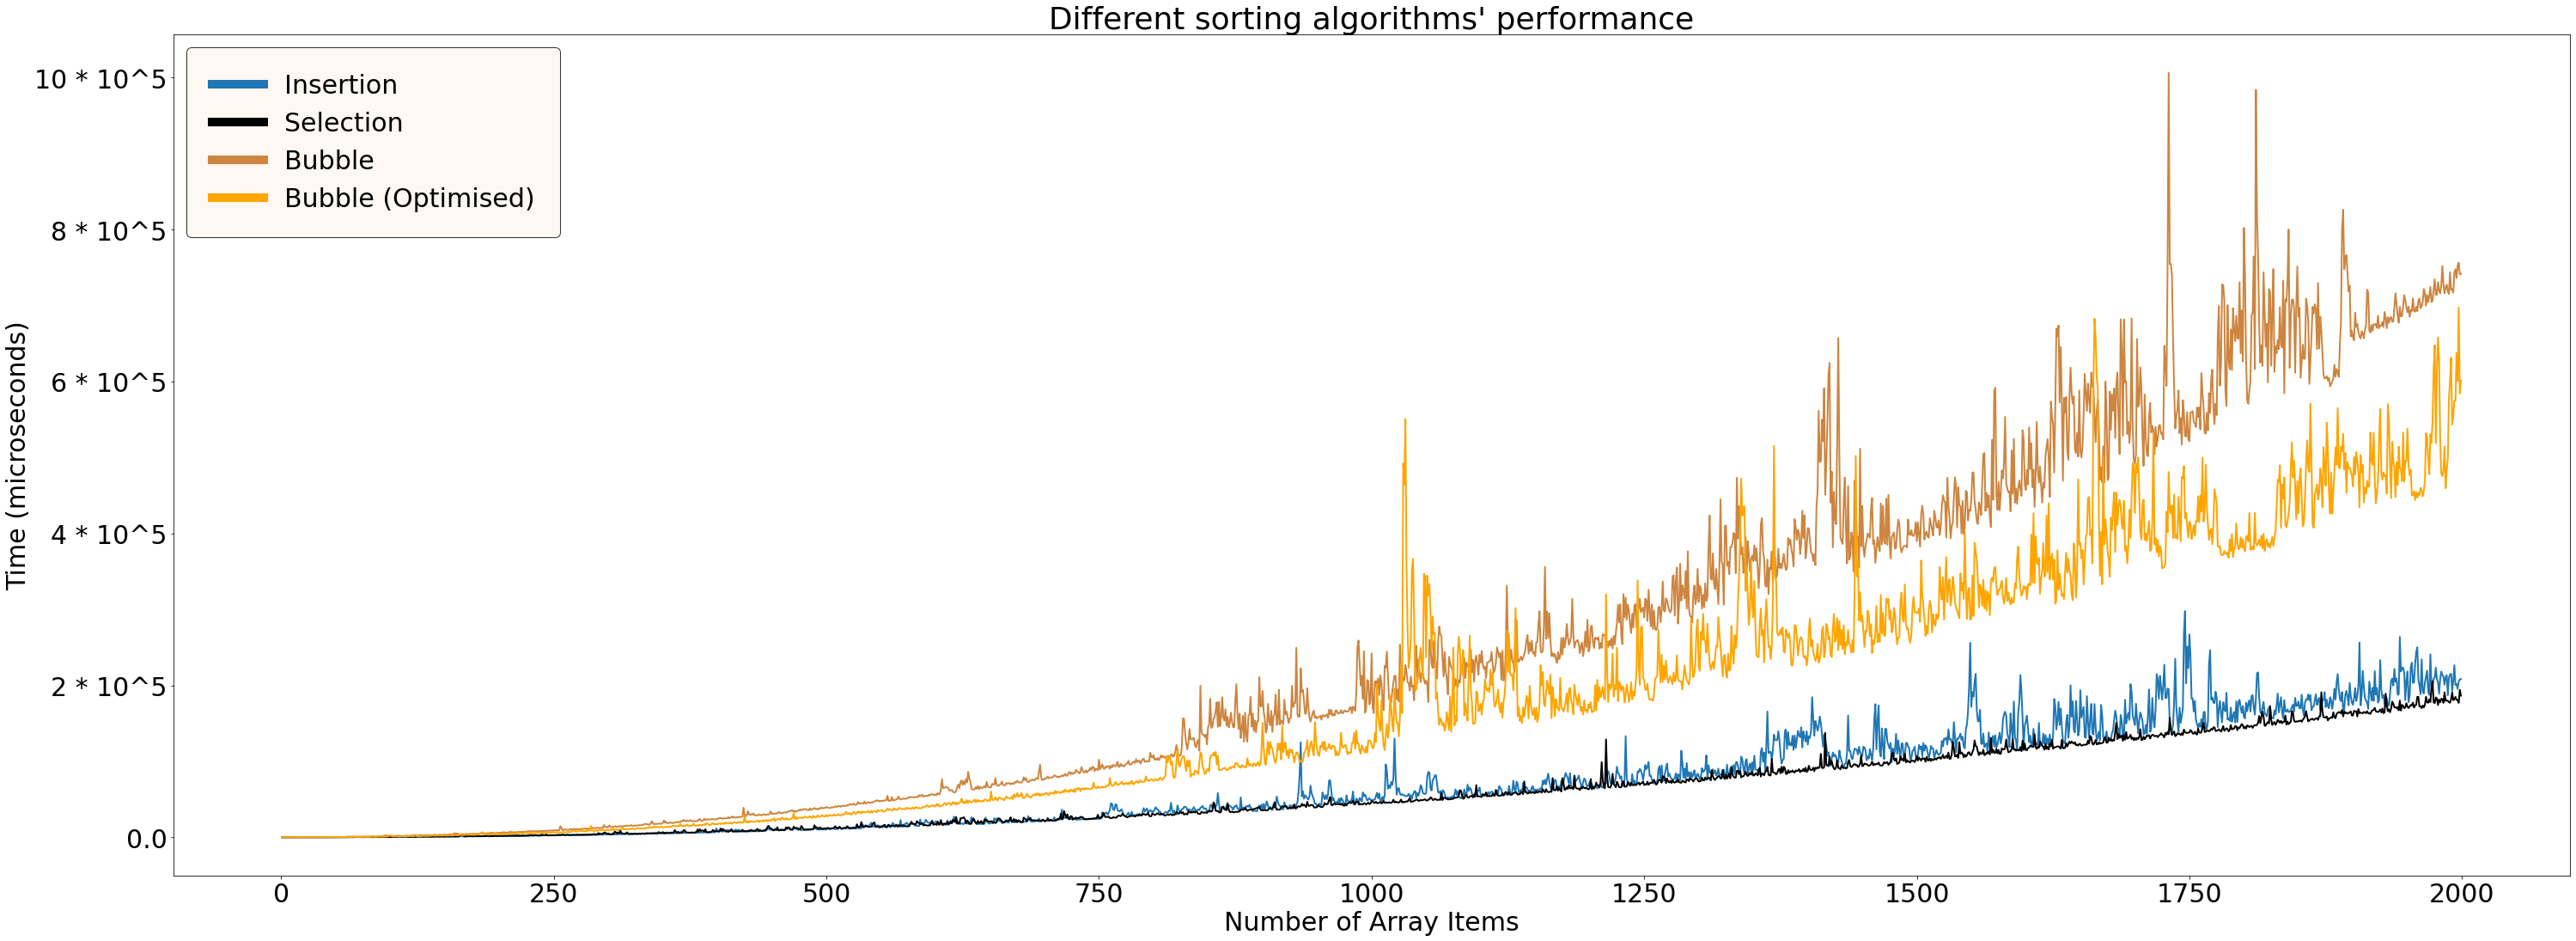

In [56]:
labels = ['Insertion', 'Selection', 'Bubble', 'Bubble (Optimised)']

fig, ax = plt.subplots(figsize = (50,18))

x_axis = list(range(1, upper_limit))

ax.plot(x_axis, benchmark_insertion, label = 'Insertion', linewidth = 2)
ax.plot(x_axis, benchmark_selection, c = 'k', label = 'Selection', linewidth = 2)
ax.plot(x_axis, benchmark_bubble_1, c = 'peru', label = 'Bubble', linewidth = 2)
ax.plot(x_axis, benchmark_bubble_2, c = 'orange', label = 'Bubble (Optimised)', linewidth = 2)

# Change y-label when suitable
yticks = ax.get_yticks().astype(str)
zeros_count = int(yticks[2].count('0')) - 1

if zeros_count > 1:
    for i in range(2, len(yticks)):
        yticks[i] = str(int(float(yticks[i])))[:zeros_count*-1] + ' * 10^' + str(zeros_count)

    ax.set_yticklabels(yticks)

# Other setup
ax.set_xlabel('Number of Array Items')
ax.set_title("Different sorting algorithms' performance")
ax.set_ylabel('Time (microseconds)')
leg = ax.legend(loc = 'upper left', facecolor = 'seashell', edgecolor = 'k', borderpad = 1)

for line in leg.get_lines():
    line.set_linewidth(10)

plt.rcParams["font.size"] = "30"

save_fig = input("Would you like to save the plot in high resolutions (yes): ")
if save_fig.lower() == 'yes':
    plt.savefig('Sort_v2 comparison.png', dpi = 300, facecolor = 'w', transparent = False, bbox_inches = 'tight')

plt.show()

# *Other links*

[Python Objects Nature and Numpy Arrays (Why a copy of array is needed when sorting) | StackOverflow](https://stackoverflow.com/a/3059553/14046889)

[How to switch position of two items in a Python list?](https://stackoverflow.com/questions/2493920/how-to-switch-position-of-two-items-in-a-python-list)

[Sorting Algorithms](https://www.programiz.com/dsa/sorting-algorithm)